In [1]:
!pip3 install umap-learn

    100% |████████████████████████████████| 40kB 2.4MB/s 
    100% |████████████████████████████████| 3.2MB 6.2MB/s 
    100% |████████████████████████████████| 16.1MB 2.9MB/s 
  Running setup.py bdist_wheel for umap-learn ... - done
  Stored in directory: /root/.cache/pip/wheels/be/a5/95/6cb125db66c98d790fa627977d6cacd16c59a6bfeeab957aa3
Successfully built umap-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.datasets import cifar10
%matplotlib inline

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

In [8]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(X_train, Y_train)
embedding_train = reducer.transform(X_train)
embedding_test = reducer.transform(X_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
Construct embedding


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


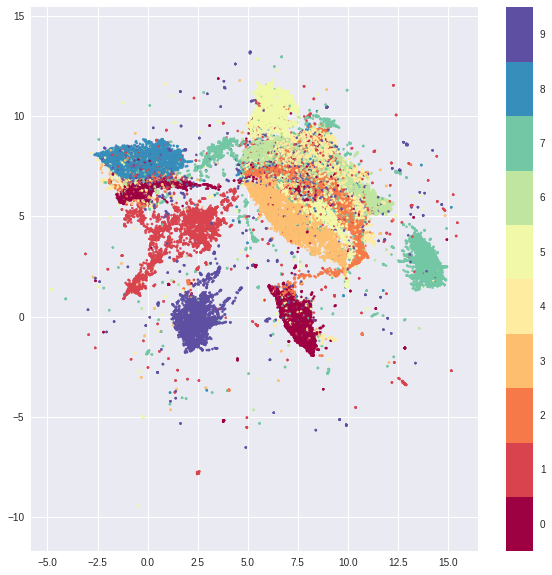

In [10]:
plt.figure(figsize = (10, 10))
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c = Y_train.ravel(), cmap = 'Spectral', s = 5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))

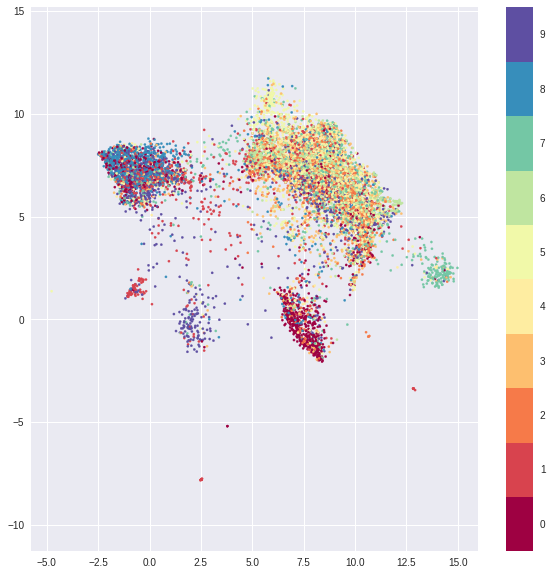

In [11]:
plt.figure(figsize = (10, 10))
plt.scatter(embedding_test[:, 0], embedding_test[:, 1], c = Y_test.ravel(), cmap = 'Spectral', s = 5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))